# avocado prices

My project based on data from kaggle.com - "Avocado Prices". Also first attempt in time series stuff and nice visualizations.
I'll also be using https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/ this as a basis for my 'experiments'. Lol.

#### load environment

In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### data loading and exploration

In [56]:
data = pd.read_csv("avocado.csv", index_col='Date')
data = data.drop(['Unnamed: 0', '4046', '4225', '4770'], axis=1)
data.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,
2015-12-27,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [57]:
data.index

Index(['2015-12-27', '2015-12-20', '2015-12-13', '2015-12-06', '2015-11-29',
       '2015-11-22', '2015-11-15', '2015-11-08', '2015-11-01', '2015-10-25',
       ...
       '2018-03-11', '2018-03-04', '2018-02-25', '2018-02-18', '2018-02-11',
       '2018-02-04', '2018-01-28', '2018-01-21', '2018-01-14', '2018-01-07'],
      dtype='object', name='Date', length=18249)

In [59]:
data.shape

(18249, 9)

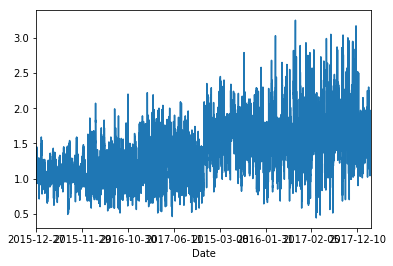

In [60]:
data['AveragePrice'].plot()

In [61]:
data['income'] = data['AveragePrice'] * data['Total Volume']
data.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,income
Date,,,,,,,,,,
2015-12-27,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,85434.7046
2015-12-20,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,74083.9230
2015-12-13,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,109944.8046
2015-12-06,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,85311.5220
2015-11-29,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,65330.6880


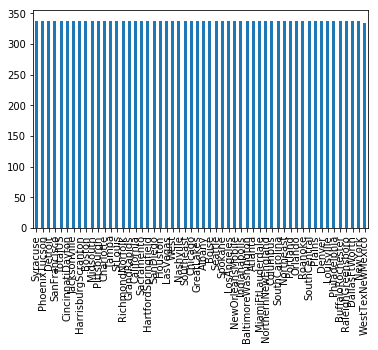

In [62]:
data['region'].value_counts().plot(kind='bar')

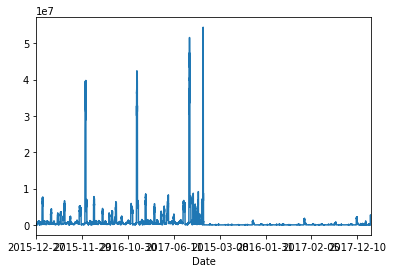

In [63]:
data['income'].plot()

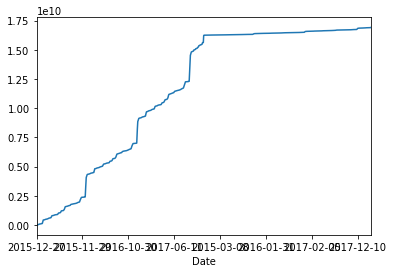

In [66]:
ts = pd.Series(data['income'])
ts = ts.cumsum()
ts.plot()

### autoregression (AR)

Here, I'll discover what it really is. Seems to be basic approach to do stuff.